<a href="https://colab.research.google.com/github/a-pujahari/EVA7/blob/main/Session11/YoloV3_CustomDataset/EVA7_AssignmentS11_YOLO_AbhinavP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dependencies

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


## Clone YOLOv3 Repo

In [2]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 20.75 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Upload Custom Data

In [3]:
# Retrieve customdata with added images
!gdown --id 1JpGXR1eXZdQsvpItmPTsjU4ecqrghPUk

Downloading...
From: https://drive.google.com/uc?id=1JpGXR1eXZdQsvpItmPTsjU4ecqrghPUk
To: /content/data.zip
100% 280M/280M [00:03<00:00, 85.1MB/s]


In [4]:
!mv data.zip /content/YoloV3/

In [5]:
cd YoloV3

/content/YoloV3


In [6]:
# Unzip raw zip file
!unzip -qq 'data.zip'

replace data/customdata/custom.shapes? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
y


In [7]:
pwd

'/content/YoloV3'

In [8]:
!mkdir weights
!cd weights
!gdown --id 1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4

Downloading...
From: https://drive.google.com/uc?id=1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4
To: /content/YoloV3/yolov3-spp-ultralytics.pt
100% 252M/252M [00:01<00:00, 169MB/s]


## Train

In [17]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 20 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=20, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2917 found, 131 missing, 38 empty, 0 duplicate, for 3086 images): 100% 3086/3086 [00:00<00:00, 5099.04it/s]
Caching images (1.7GB): 100% 3086/3086 [00:21<00:00, 146.84it/s]
Caching labels (303 found, 14 missing, 7 empty, 0 duplicate, for 324 images): 100% 324/324 [00:00<00:00, 4531.68it/s]
Caching images (0.1GB): 100% 324/324 [00:02<00:00, 112.24it/s]
Image sizes 512 - 512 train, 512 test
Using 

In [20]:
!python detect.py --conf-thres 0.3 --source "/content/YoloV3/data/sample_vid2.mp4" --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='/content/YoloV3/data/sample_vid2.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/431) /content/YoloV3/data/sample_vid2.mp4: 320x512 1 hardhats, 1 vests, Done. (0.019s)
video 1/1 (2/431) /content/YoloV3/data/sample_vid2.mp4: 320x512 1 hardhats, 1 vests, 1 bo

In [22]:
!python detect.py --conf-thres 0.3 --source "/content/YoloV3/data/custom_images" --output out_images

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_images', save_txt=False, source='/content/YoloV3/data/custom_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/60 /content/YoloV3/data/custom_images/boots1.jpg: 384x512 2 bootss, Done. (0.023s)
image 2/60 /content/YoloV3/data/custom_images/boots10.jpg: 384x512 1 bootss, Done. (0.016s)
image

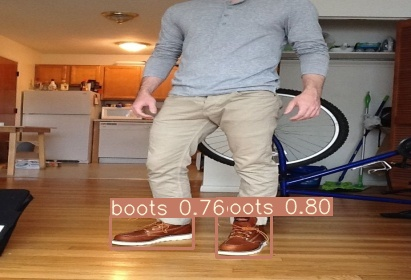

In [24]:
Image(filename='/content/YoloV3/out_images/boots1.jpg', width=480)

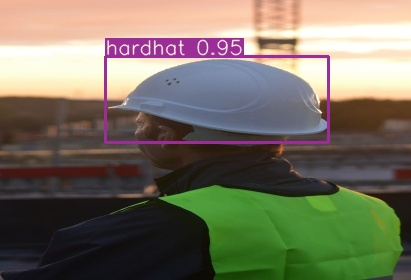

In [25]:
Image(filename='/content/YoloV3/out_images/hardhat1.jpg', width=480)

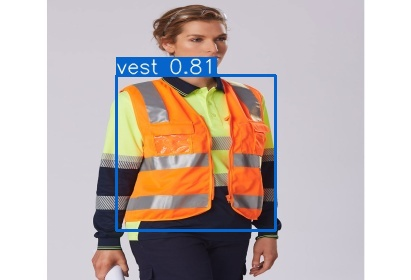

In [26]:
Image(filename='/content/YoloV3/out_images/vest1.jpg', width=480)

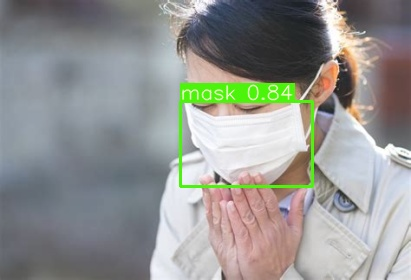

In [27]:
Image(filename='/content/YoloV3/out_images/mask1.jpg', width=480)

In [29]:
!zip -r /content/outImages.zip /content/YoloV3/out_images

  adding: content/YoloV3/out_images/ (stored 0%)
  adding: content/YoloV3/out_images/mask11.jpg (deflated 1%)
  adding: content/YoloV3/out_images/hardhat2.jpg (deflated 1%)
  adding: content/YoloV3/out_images/mask1.jpg (deflated 1%)
  adding: content/YoloV3/out_images/boots5.jpg (deflated 1%)
  adding: content/YoloV3/out_images/vest3.jpg (deflated 1%)
  adding: content/YoloV3/out_images/boots12.jpg (deflated 0%)
  adding: content/YoloV3/out_images/vest8.jpg (deflated 0%)
  adding: content/YoloV3/out_images/hardhat11.jpg (deflated 2%)
  adding: content/YoloV3/out_images/hardhat9.jpg (deflated 1%)
  adding: content/YoloV3/out_images/vest4.jpg (deflated 1%)
  adding: content/YoloV3/out_images/hardhat7.jpg (deflated 0%)
  adding: content/YoloV3/out_images/mask14.jpg (deflated 1%)
  adding: content/YoloV3/out_images/boots4.jpg (deflated 1%)
  adding: content/YoloV3/out_images/vest10.jpg (deflated 1%)
  adding: content/YoloV3/out_images/mask8.jpg (deflated 0%)
  adding: content/YoloV3/out_im